### Importing and building the plotting functions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

In [2]:
%matplotlib inline
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 20)
plt.style.use('fivethirtyeight')
# plt.style.use('seaborn')

In [3]:
def plotter(DF, name, xlabel= 'Date', scale = 'log', col = 'imp'):
    plt.figure(figsize = (14, 7))
    plt.yscale(scale)
    
    columns = DF.columns if col == 'all' else Countries[::-1]
    for col in columns:
        plt.plot(DF.index,
                 DF[col],
                 label = col if col in Countries else None,
                 linestyle = ':' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 alpha = 0.8# if col in Countries else 0.4
                )
    plt.title(name+' wrt Date in Countries')
    plt.xlabel(xlabel)
    plt.ylabel(name)
    plt.legend(loc = 2)
    plt.show()

In [4]:
def plotwrtDeaths(DF2, name1, DF, name2 = 'Deaths', scale = 'log', col = 'imp'):
    plt.figure(figsize = (14, 7))
    plt.xscale(scale)
    plt.yscale(scale)
    
#     plt.ylim(bottom=0.05, top=2*10**4)
    
    columns = DF.columns if col == 'all' else Countries[::-1]
    for col in columns:
        plt.plot(DF[col],
                 DF2[col],
                 label = col if col in Countries else None,
                 linestyle = ':' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 alpha = 0.8 if col in Countries else 0.4
                )
    plt.title(f'{name1} wrt {name2} in Countries')
    plt.xlabel(name2)
    plt.ylabel(name1)
    plt.legend(loc = 2)
    plt.show()

In [5]:
def stackplotter(DF, name, tail=None):
    plt.figure(figsize = (14, 7))
    
    if tail:
        DF = DF.tail(tail)
    columns = Countries[::-1]
    columns = [t for t in columns if 'World' not in t][::-1]
    
    plt.stackplot(DF.index, 
                  DF[['World']].T, 
                  labels=['World'], 
                  colors=['blue'], 
                  alpha=0.2,                 
                 )
    
    plt.stackplot(DF.index, 
                  DF[columns].T, 
                  labels=columns, 
                  colors=[colors[c] for c in columns], 
                  alpha=0.8,                 
                 )
    
    
    plt.title(name+' wrt Date in Countries')
    plt.xlabel('Date')
    plt.ylabel(name)
    plt.legend(loc = 2)
    plt.show()

### Importing the Data from Johns Hopkins data

In [6]:
data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
DF = pd.read_csv(data_url)

In [7]:
DF = DF.groupby('Country/Region').sum()
DF = DF.drop(columns = ['Lat', 'Long']).transpose()
DF['World'] = DF.sum(axis = 1)
DF = DF.rename(columns = {'United Kingdom': 'UK', 'Korea, South': 'S.Korea', 'Country/Region': 'Date'})
DF.index = pd.to_datetime(DF.index, format = '%m/%d/%y')
# DF.index.rename('Date', inplace = True)

Deaths = DF.copy()

In [8]:
data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
DF = pd.read_csv(data_url)

In [9]:
DF = DF.groupby('Country/Region').sum()
DF = DF.drop(columns = ['Lat', 'Long']).transpose()
DF['World'] = DF.sum(axis = 1)
DF = DF.rename(columns = {'United Kingdom': 'UK', 'Korea, South': 'S.Korea', 'Country/Region': 'Date'})
DF.index = pd.to_datetime(DF.index, format = '%m/%d/%y')
# DF.index.rename('Date', inplace = True)

Confirmed = DF.copy()

In [10]:
colors = {'India': 'Blue', 
          'World': 'Blue', 
          'US': 'Black', 
          'Brazil': 'darkgreen', 
          'Mexico': 'Orange', 
          'UK': 'Purple', 
          'Italy': 'grey', 
          'Russia': 'cyan', 
          'France': 'violet', 
          'Germany': 'lime', 
          'Spain': 'teal',
          'Colombia': 'lightgreen', 
#           'Argentina': 'Teal',
          'Iran': 'brown', 
          'China': 'red', 
          'Peru': 'yellow'
         }

Countries = list(colors.keys())

### Deaths

In [11]:
Deaths[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-11-15,463852,5107254,764533,611346,291147,143384,132819,251796,119177,97986,87716,127833,128272,4849,200672
2021-11-16,464153,5114874,765811,611478,291204,143598,132893,253009,119225,98278,87745,127865,128406,4849,200695
2021-11-17,464623,5124002,767433,611851,291573,143799,132965,254229,119281,98544,87775,127912,128531,4849,200741
2021-11-18,465082,5132202,768695,612144,291929,143999,133034,255448,119333,98751,87804,127963,128634,4849,200767
2021-11-19,465349,5140519,770691,612370,291929,144158,133082,256669,119383,98993,87810,128013,128734,4849,200801


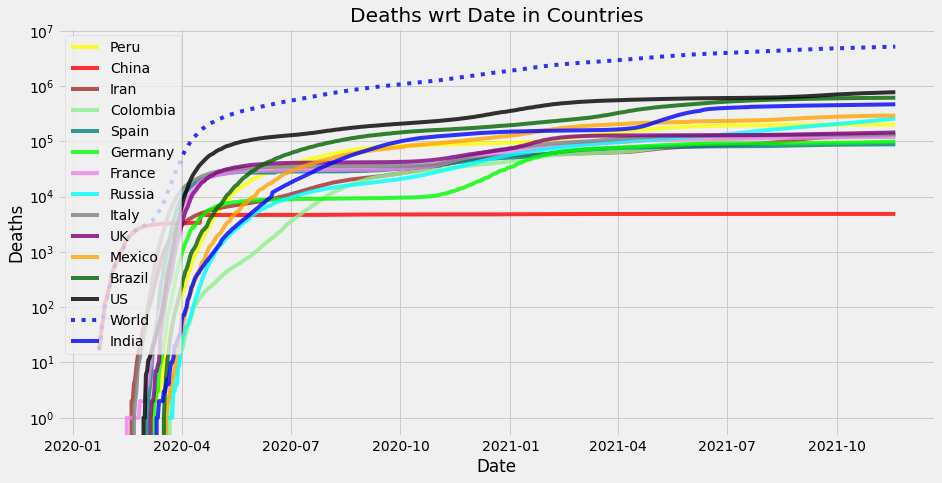

In [12]:
plotter(Deaths, 'Deaths')

### Confirmed Cases

In [13]:
Daily_Confirmed = np.round((Confirmed - Confirmed.shift(1))/1)
Daily_Confirmed = Daily_Confirmed.fillna(0).astype('int')
Daily_Confirmed[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-11-15,8865,540328,138787,2799,942,40665,5199,37210,3307,34958,9798,2321,7494,28,830
2021-11-16,10197,526401,87586,4918,775,37130,7815,35612,19884,53627,4091,2021,6430,32,1459
2021-11-17,11919,624866,111404,11977,4571,38254,10167,35415,20365,68366,6667,2257,6251,38,1370
2021-11-18,11106,612610,109578,12301,3915,48053,10645,36155,20396,58768,6315,2121,5882,28,1415
2021-11-19,10302,619373,129060,13355,0,44835,10554,35935,21270,57302,6636,2157,5784,24,1537


In [14]:
Confirmed_EWM = np.round(Daily_Confirmed.ewm(com=14).mean().astype(int))
Confirmed_EWM[Countries].tail()

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-11-15,13321,461606,80987,11015,3363,38313,5541,36362,7695,26176,2788,1982,8950,63,915
2021-11-16,13113,465925,81427,10608,3191,38234,5693,36312,8507,28006,2875,1985,8782,61,951
2021-11-17,13033,476521,83426,10700,3283,38235,5991,36252,9298,30696,3128,2003,8613,60,979
2021-11-18,12904,485594,85169,10806,3325,38890,6301,36246,10038,32568,3340,2011,8431,57,1008
2021-11-19,12731,494513,88095,10976,3103,39286,6585,36225,10787,34217,3560,2021,8255,55,1043


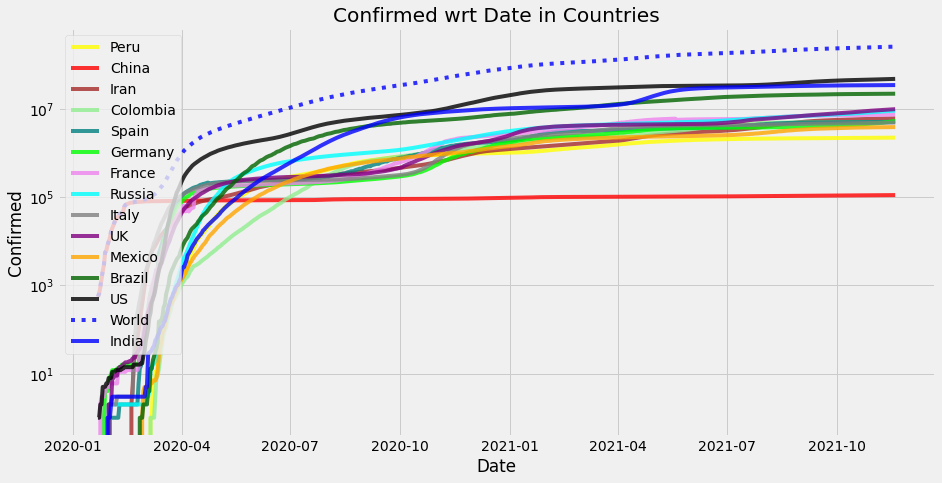

In [15]:
plotter(Confirmed, 'Confirmed')

### Daily Deaths

In [16]:
Daily_Deaths = np.round((Deaths - Deaths.shift(1))/1)
Daily_Deaths = Daily_Deaths.fillna(0).astype('int')
Daily_Deaths[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-11-15,197,6714,1271,63,58,47,44,1187,75,266,43,24,105,0,37
2021-11-16,301,7620,1278,132,57,214,74,1213,48,292,29,32,134,0,23
2021-11-17,470,9128,1622,373,369,201,72,1220,56,266,30,47,125,0,46
2021-11-18,459,8200,1262,293,356,200,69,1219,52,207,29,51,103,0,26
2021-11-19,267,8317,1996,226,0,159,48,1221,50,242,6,50,100,0,34


### Exponential Weighted Mean

In [17]:
EWM = np.round(Daily_Deaths.ewm(com=7).mean(), 2)
name = 'Exponential Weighted Mean Weekly'

Weekly_Avg = np.round((Deaths - Deaths.shift(7))/7, 2)
# name = 'Weekly Average Deaths'

AVG = EWM 
# AVG = Weekly_Avg
AVG[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-11-15,349.20,6933.82,1122.46,247.64,198.20,139.28,47.98,1168.60,36.36,144.85,23.26,36.20,130.01,0.0,29.36
2021-11-16,343.18,7019.59,1141.90,233.19,180.55,148.62,51.23,1174.15,37.82,163.25,23.98,35.67,130.51,0.0,28.56
2021-11-17,359.03,7283.14,1201.92,250.66,204.11,155.17,53.83,1179.88,40.09,176.09,24.73,37.09,129.82,0.0,30.74
2021-11-18,371.53,7397.75,1209.43,255.96,223.09,160.77,55.73,1184.77,41.58,179.95,25.26,38.83,126.47,0.0,30.15
2021-11-19,358.46,7512.66,1307.75,252.21,195.21,160.55,54.76,1189.30,42.63,187.71,22.85,40.22,123.16,0.0,30.63


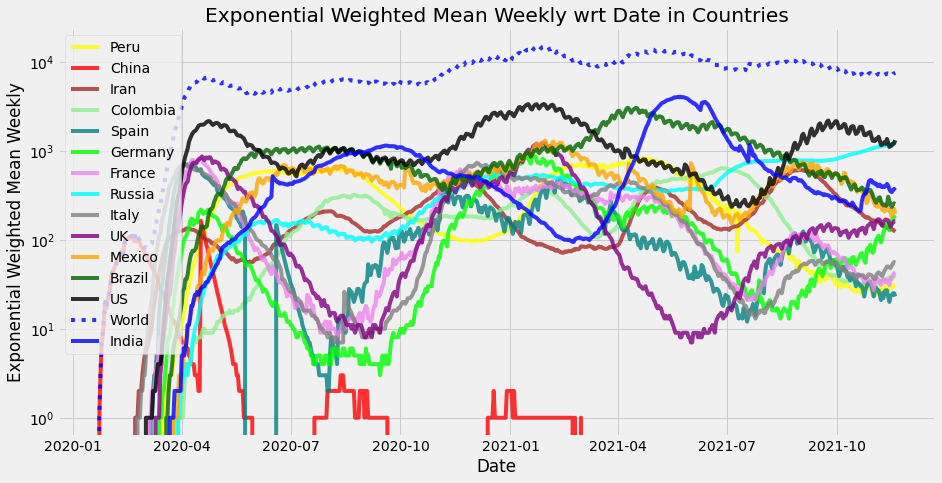

In [18]:
plotter(np.round(AVG), name)

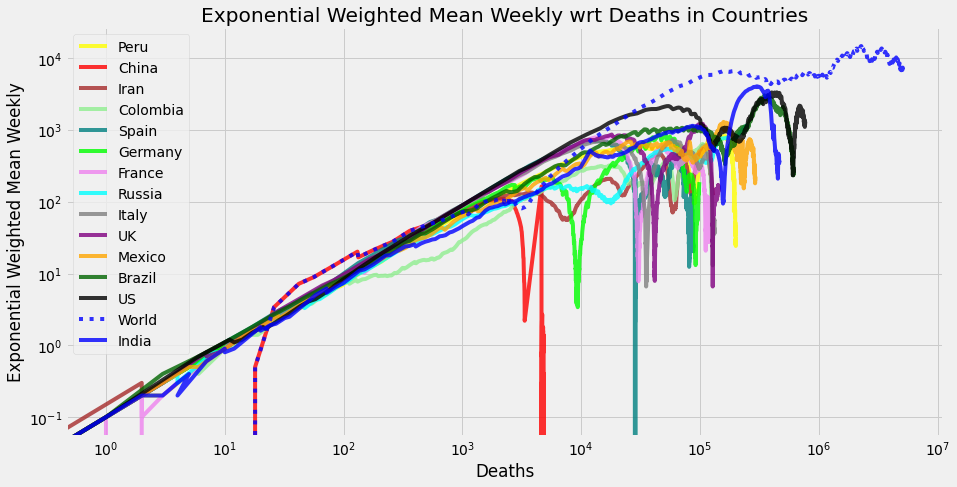

In [19]:
plotwrtDeaths(np.round(AVG, 1), name, Deaths)

### Stack Plots

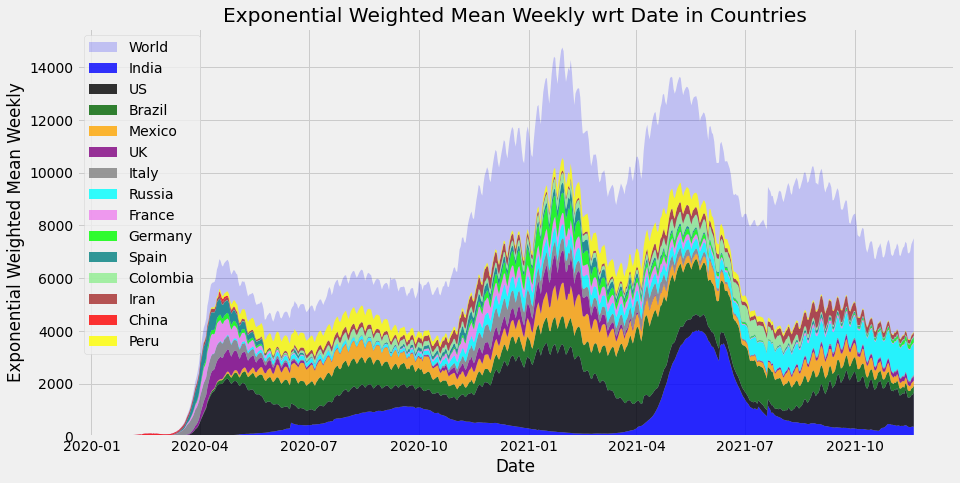

In [20]:
stackplotter(AVG, name)

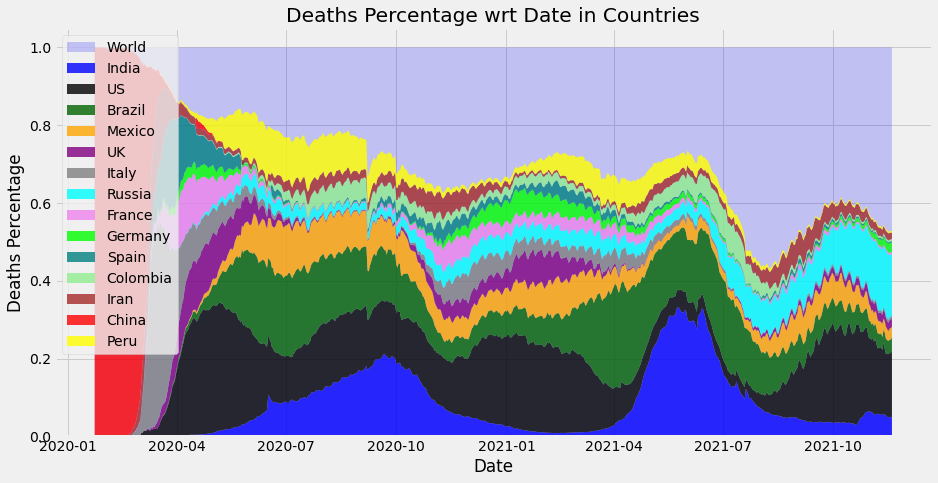

In [21]:
stackplotter(AVG.divide(AVG.World, axis=0), 'Deaths Percentage')

### Reproductivity

In [22]:
Reproductivity = np.round(EWM/EWM.shift(14), 4).clip(lower= 0.1)
Reproductivity[EWM.shift(14) < 12] = 1

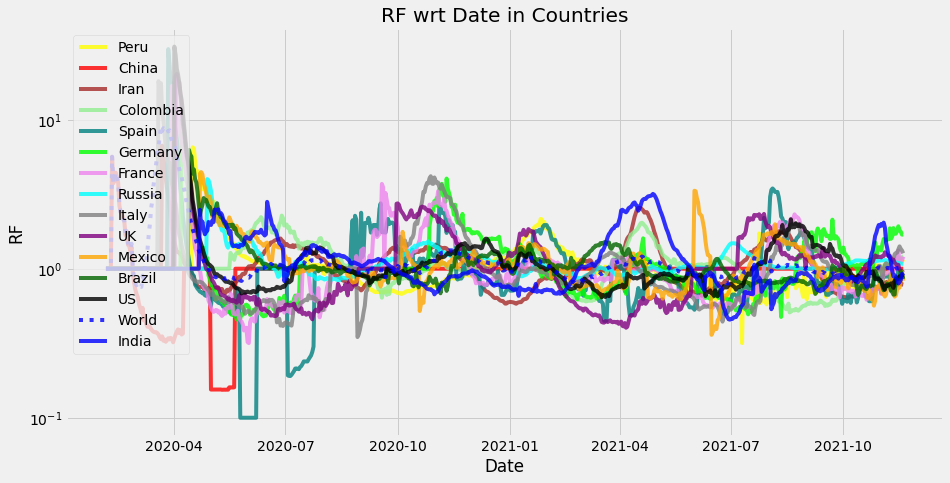

In [23]:
plotter(Reproductivity, 'RF')

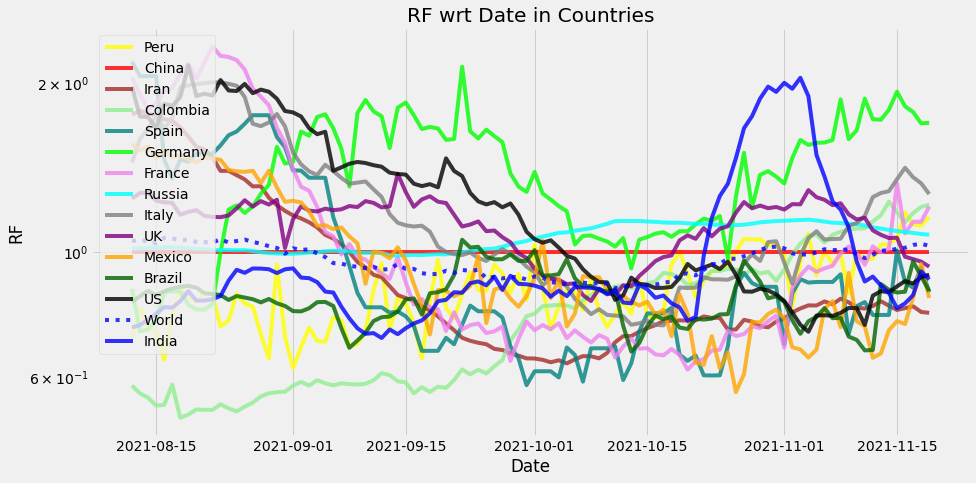

In [24]:
plotter(Reproductivity.tail(100), 'RF')

### Test rate

In [25]:
# We take the mortality to be 0.5%

mortality = 0.005

Testrate = np.round(Confirmed_EWM/(EWM/mortality), 3)
Testrate[EWM < 12] = None

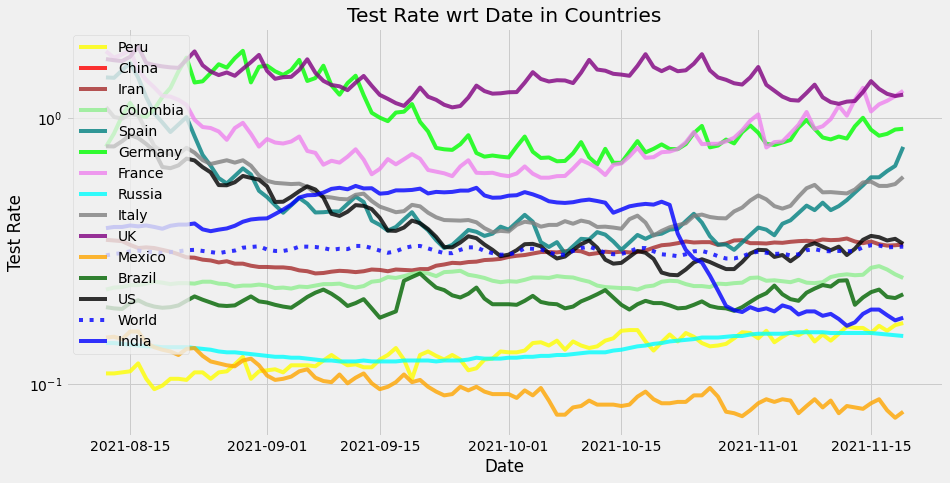

In [26]:
plotter(Testrate.tail(100), 'Test Rate', scale= 'log')

### Time Adjusted for starting day

In [27]:
def adjust_days(DF):
    X = DF.copy()
#     X.reset_index()
    for col in DF.columns:
        L = list(DF[Deaths[col]>5][col])
        X[col] = L + [None for _ in range(len(X[col]) - len(L))]
    return X.reset_index()[DF.columns]
xlabel= 'Days from 5 Deaths'

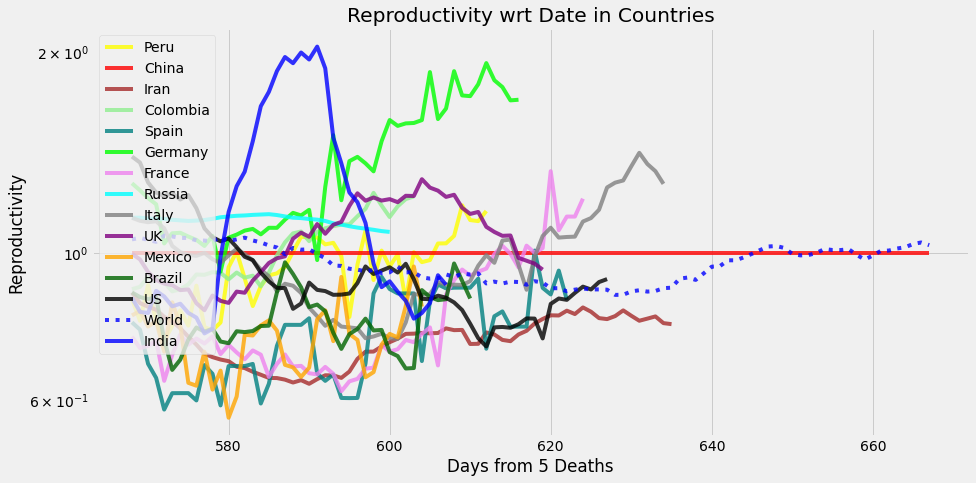

In [28]:
RF_A = adjust_days(Reproductivity)
plotter(RF_A.tail(100), 'Reproductivity', xlabel)

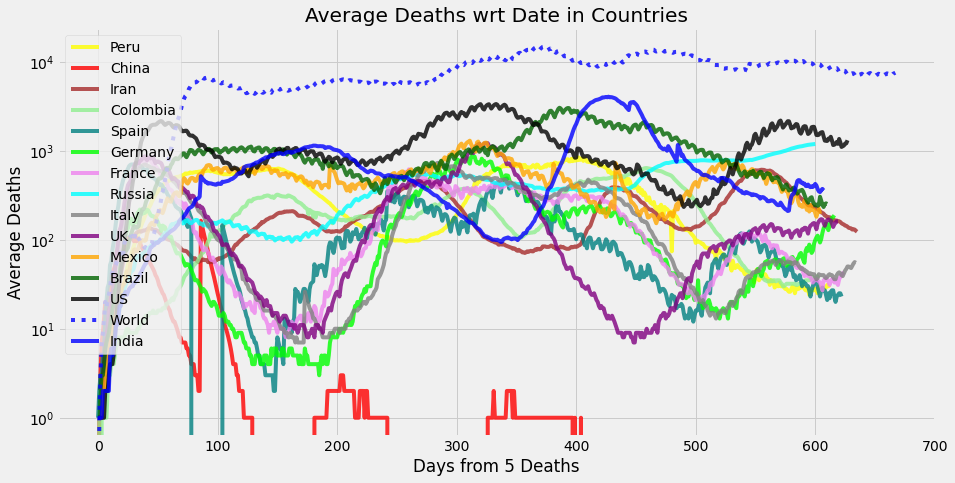

In [29]:
AVG_A = adjust_days(AVG)
plotter(np.round(AVG_A), 'Average Deaths', xlabel)

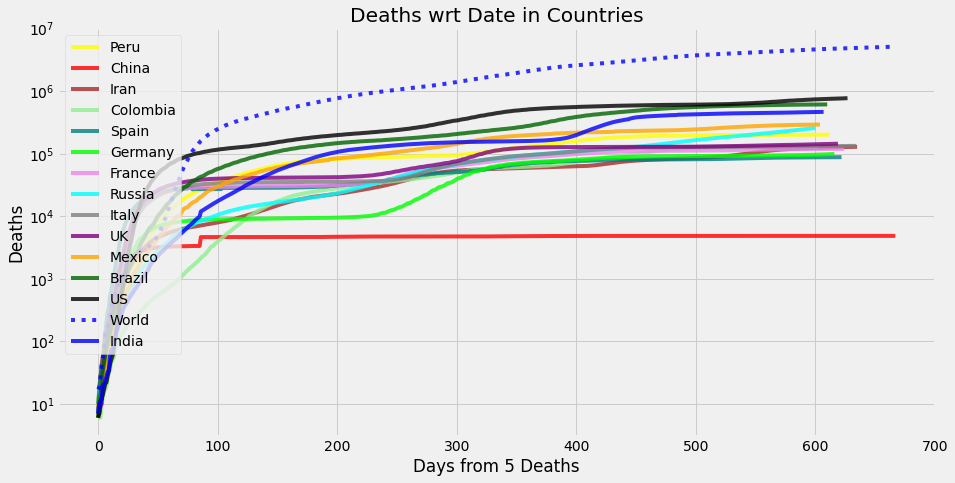

In [30]:
Deaths_A = adjust_days(Deaths)
plotter(Deaths_A, 'Deaths', xlabel)

### Today's Statistics by combining the previous tables

In [31]:
LastDay_DF = pd.DataFrame()
LastDay_DF['Country'] = Deaths.columns
LastDay_DF = LastDay_DF.set_index('Country')

D = {
    'Deaths':Deaths,
    'Daily_Deaths':Daily_Deaths,
    'Weekly_Deaths': Weekly_Avg,
    'EWM7': EWM,
    'Reproductivity':Reproductivity,
    'Confirmed': Confirmed, 
    'Testrate': Testrate,
    'Confirmed_EWM': Confirmed_EWM
    }
for name in D:
    LastDay_DF[name] = D[name].iloc[-1]
LastDay_DF['Estimated(M)'] = np.round((LastDay_DF.Deaths/mortality)/1000000, 2)

In [32]:
LastDay_DF.sort_values('Deaths', ascending = False).head(12)

,Deaths,Daily_Deaths,Weekly_Deaths,EWM7,Reproductivity,Confirmed,Testrate,Confirmed_EWM,Estimated(M)
Country,,,,,,,,,
World,5140519,8317,7334.43,7512.66,1.0265,256692023,0.329,494513,1028.10
US,770691,1996,1143.00,1307.75,0.9128,47660379,0.337,88095,154.14
Brazil,612370,226,268.43,252.21,0.8535,22003317,0.218,10976,122.47
India,465349,267,300.57,358.46,0.8951,34499925,0.178,12731,93.07
Mexico,291929,0,185.57,195.21,0.8300,3854994,0.079,3103,58.39
Russia,256669,1221,1209.43,1189.30,1.0745,9099253,0.152,36225,51.33
Peru,200801,34,32.57,30.63,1.1550,2221154,0.170,1043,40.16
UK,144158,159,148.86,160.55,0.9432,9817505,1.223,39286,28.83
Indonesia,143714,5,12.29,15.23,0.5340,4252705,0.216,659,28.74


In [33]:
LastDay_DF.sort_values('Weekly_Deaths', ascending = False).head(12)

,Deaths,Daily_Deaths,Weekly_Deaths,EWM7,Reproductivity,Confirmed,Testrate,Confirmed_EWM,Estimated(M)
Country,,,,,,,,,
World,5140519,8317,7334.43,7512.66,1.0265,256692023,0.329,494513,1028.10
Russia,256669,1221,1209.43,1189.30,1.0745,9099253,0.152,36225,51.33
US,770691,1996,1143.00,1307.75,0.9128,47660379,0.337,88095,154.14
Ukraine,85151,758,688.71,694.66,1.1813,3461873,0.144,20069,17.03
Romania,54624,281,301.57,335.99,0.7620,1758068,0.104,6975,10.92
India,465349,267,300.57,358.46,0.8951,34499925,0.178,12731,93.07
Brazil,612370,226,268.43,252.21,0.8535,22003317,0.218,10976,122.47
Poland,80399,405,263.43,227.49,2.4609,3303046,0.287,13057,16.08
Philippines,46698,276,237.57,211.10,1.1063,2823210,0.078,3289,9.34


### Pie Chart

In [34]:
def piechart(name='Deaths', size=12, DF=LastDay_DF):
    plt.figure(figsize = (size, size))
    DF = DF.sort_values(name, ascending = False)
    
    countries = DF.index[1:]
    deaths = DF[name][1:].clip(0, None)
    
    print ('World total: ',int( DF.loc['World'][name]))
    
    plt.pie(deaths, 
            labels= [c +' '+ str(d) for c, d in zip(countries, deaths)], 
            startangle=90,
            counterclock=False,
            autopct='%1.f%%', 
#             pctdistance=0.8
           )
    
    plt.title(name+' piechart for every country')

World total:  5140519


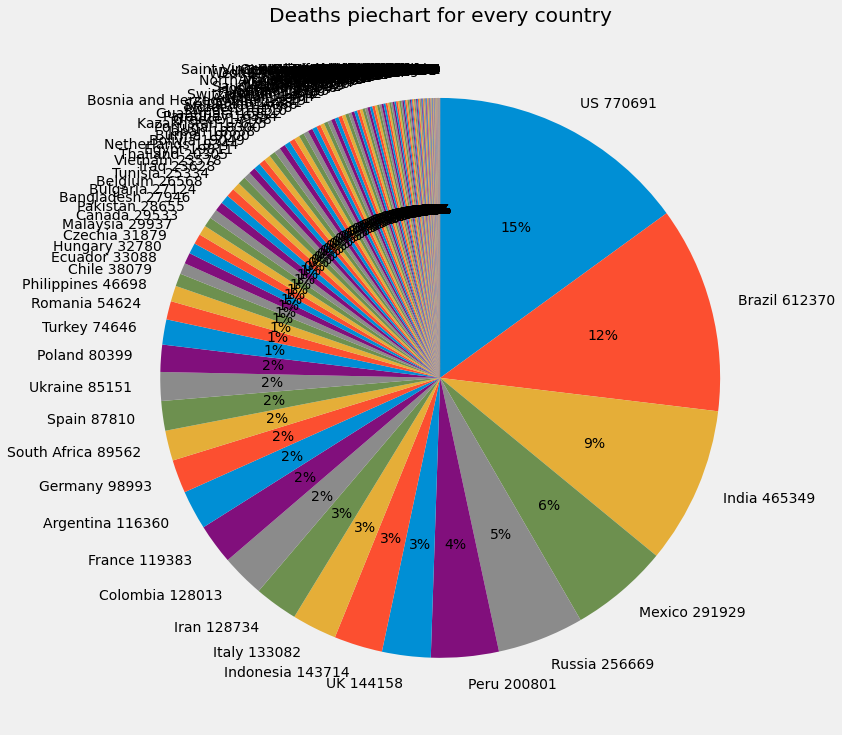

In [35]:
piechart('Deaths')

World total:  7334


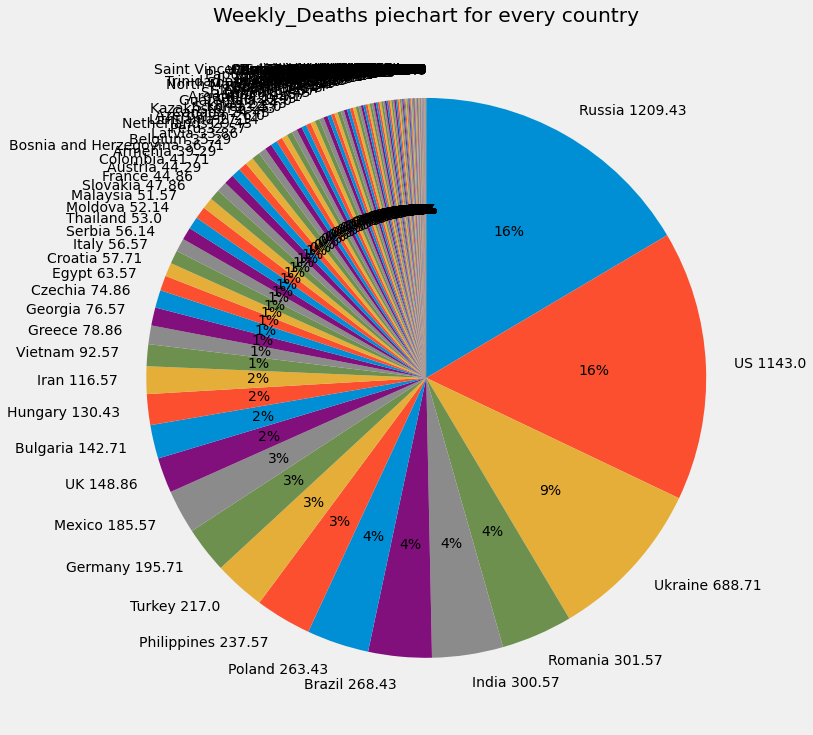

In [36]:
piechart('Weekly_Deaths')

World total:  8317


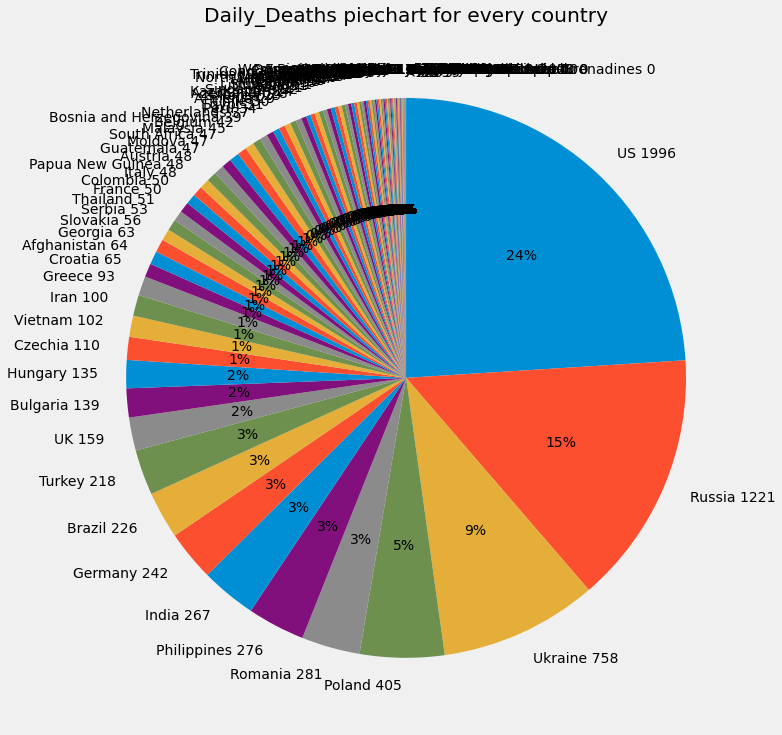

In [37]:
piechart('Daily_Deaths')

In [38]:
print('Today\'s Date: ', dt.datetime.now().date())

Today's Date:  2021-11-20


In [39]:
# Total estimated Cases: 
LastDay_DF.loc['World'].Deaths/mortality

1028103800.0

<p>Per Capita deaths are included in this  <a href="https://www.statista.com/statistics/1104709/coronavirus-deaths-worldwide-per-million-inhabitants/" rel="nofollow">Statista</a></p>

In [40]:
!git add .
!git commit -m "`date` update"
!git push origin master

The file will have its original line endings in your working directory


[master 925da95] `date` update
 1 file changed, 2132 insertions(+), 2132 deletions(-)
 rewrite Simplified Death Statistics SARS-COV2.ipynb (67%)


To https://github.com/Arrowheadahp/COVID-19.git
   3f35849..925da95  master -> master
